In [1]:
import pandas as pd
df=pd.read_csv('data_telco_customer_churn.csv')

## Business Problem dan Data Understanding


Penggunaan sarana telekomunikasi nirkabel dan kabel menjadi salah satu kebutuhan yang utama pada setiap keperluan rumah tangga ataupun bisnis.Telekomunikasi menjadi salah satu industri yang memiliki perubahan yang cukup cepat diikuti dengan perubahan teknologi yang semakin terdepan. Industri ini berawal dari pelayanan telefon dan saat ini sudah merambah pada televisi, radio, telefon nirkabel atau komunikasi satelit, serta akses internet. Adanya perkembangan teknologi, menciptakan perubahan model pelayanan dari rencana awal perusahaan sehingga saling berkaitan antara satu pelayanan dengan pelayanan lainnya. Perusahaan televisi kabel saat ini juga sudah meneydiakan akses pelayanan telefon dan internet, hal ini juga ditemukan pada perusahaan telefon yang menyediakan jasa pelayanan video pada internet. Setiap perubahan yang menggeser awal mula bisnis model menjadi cukup tergabung satu sama lain merubah target pasar sehingga meningkatkan persaingan antar perusahaan telekomunikasi. 

Dilansir melalui statista, perusahaan telekomunikasi meraup keuntungan sebesar USD $33.02 pada tahun 2023 dengan pertumbuhan sebesar 0.88 % untuk tahun 2024 di California. Terdapat pertumbuhan untuk tahun mendatang namun belum cukup untuk menyaingi pertumbuhan pada tahun 2022-2023 sebesar 5%. Dilansir dari McKinsey and Company, Seiring berkembangnya waktu pada satu dekade terakhir keberadaan inovasi 3G dan 4G belum cukup tersebar dikarenakan adanya pengaruh minimnya keuntungan yang dihasilkan dibandingkan dengan keuntungan infrastruktur cloud,infrastruktur komunikasi dan pengelola data komunikasi. Apabila dibandingkan dengan beberapa sektor lainnya seperti kesehatan(143%), industri(90%), perbankan(87%), serta makanan(97%) dalam lima tahun terakhir hanya mendapatkan total return investasi pada sektor telekomunikasi (28%). 

Perkembangan sektor telekomunikasi yang cukup rendah dipengaruhi oleh adanya customer churn dimana faktor ini mampu memberikan efek pada tingkat kompetitif serta keuntungan yang dihasilkan. Churn pada industri telekomunikasi merupakan sebuah perpindahan pelanggan dari salah satu provider ke provider lainnya ataupun melakukan pemberhentian langganan. Perilaku perubahan ini memiliki hubungan korelasi negatif antara *subscriber* *churn* , *profitablity* dan *market share*. Sehingga dengan adanya korelasi tersebut menunjukan pentingnya manajemen peningkatan retensi hubungan terhadap pelanggan.Industri telekomunikasi mampu meningkatkan profit sebesar 100% hanya dengan mengurangi tingkat pelanggan *churn* 5% dari saat ini. (Gartner,2012). 

## Problem Statement 
Mempertahankan pelanggan atau mengurangi tingkat pelanggan yang churn dapat menghemat pengeluaran untuk mendapatkan pelanggan baru. Dikarenakan pelanggan yang sudah terbiasa dengan produk dapat terbiasa dengan perubahan harga sehingga dapat berkontribusi pada keuntungan perusahaan. Dengan strategi retaining yang tepat dapat menumbuhkan pengalaman personal terhadap pelanggan yang lebih emosional dibandingkan dengan penggunaan iklan dan kampanye pemasaran.  
Beberapa pengaruh yang menjadi faktor penentu perilaku pelanggan untuk *churn* diantaranya:


## Goals:
Dikarenakan pentingnya tingkat retensi sebuah produk, hal yang dapat dilakukan adalah dengan mempelajari beberapa perilaku yang mampu menggambarkan pelanggan yang *churn*. Data yang akan dianalisa diatas mencakup beberapa faktor penting untuk menentukan perilaku churn. Dependents kolom berisi keterangan mengenai status pelanggan yang hidup sendiri atau berdampingan dengan anggota keluarga yang masih bergantung pada pelanggan. Tenure menunjukan total bulan yang dihasbiskan pelanggan terhadap pelayanan yang diberikan. 	OnlineSecurity	OnlineBackup InternetService DeviceProtection TechSupport merupakan indikasi pelayanan telekomunikasi yang digunakan oleh pelanggan. Contract merupakan tipe kesepakatan jumlah bulan atau tahun untuk pelayanan. Paperless billing merupakan indikasi penggunaan billing secara digital atau tidak. Lalu fitur yang terakhir adalah jumlah tagihan bulanan. Beberapa indikasi perilaku diatas mampu memproyeksikan tingkat churn sehingga dapat dilakukan langkah pencegahan sebelum terjadinya *churn* dengan langkah pembuatan model yang mampu mendeteksi hal tersebut dan meningkatkan efisiensi operating cost.
## Analytic Aproach:
Menganalisa data untuk menemukan pola kebiasaan dari pelanggan yang churn dan yang tidak churn atau pelanggan yang retain. 
Membangun model klasifikasi untuk membantu proses penyaringan pelanggan yang churn dan yang tidak sehingga dapat dilakukan proses "pre-caution" untuk mempertahankan pelanggan dari churn. 

## Metric Evaluation
- Type 1 error : False Positive 
    Pengeluaran biaya pemelilharaan pelanggan yang sia sia.
- Type 2 error :False Negative
    Kehilangan beberapa pelanggan yang churn karena gagal memprediksi pelanggan churn

Berdasarakn konsekuensi yang dibangun type 1 error jauh lebih merugikan dibandingkan dengan type 2 erorr sehingga diharapkan model yang dibangun mampu mememiliki false positive yang kecil oleh karena itu precision menjadi faktor evaluation metriks yang harus digunakan pada setiap model untuk menhindari bias. 



## Data  Cleaning

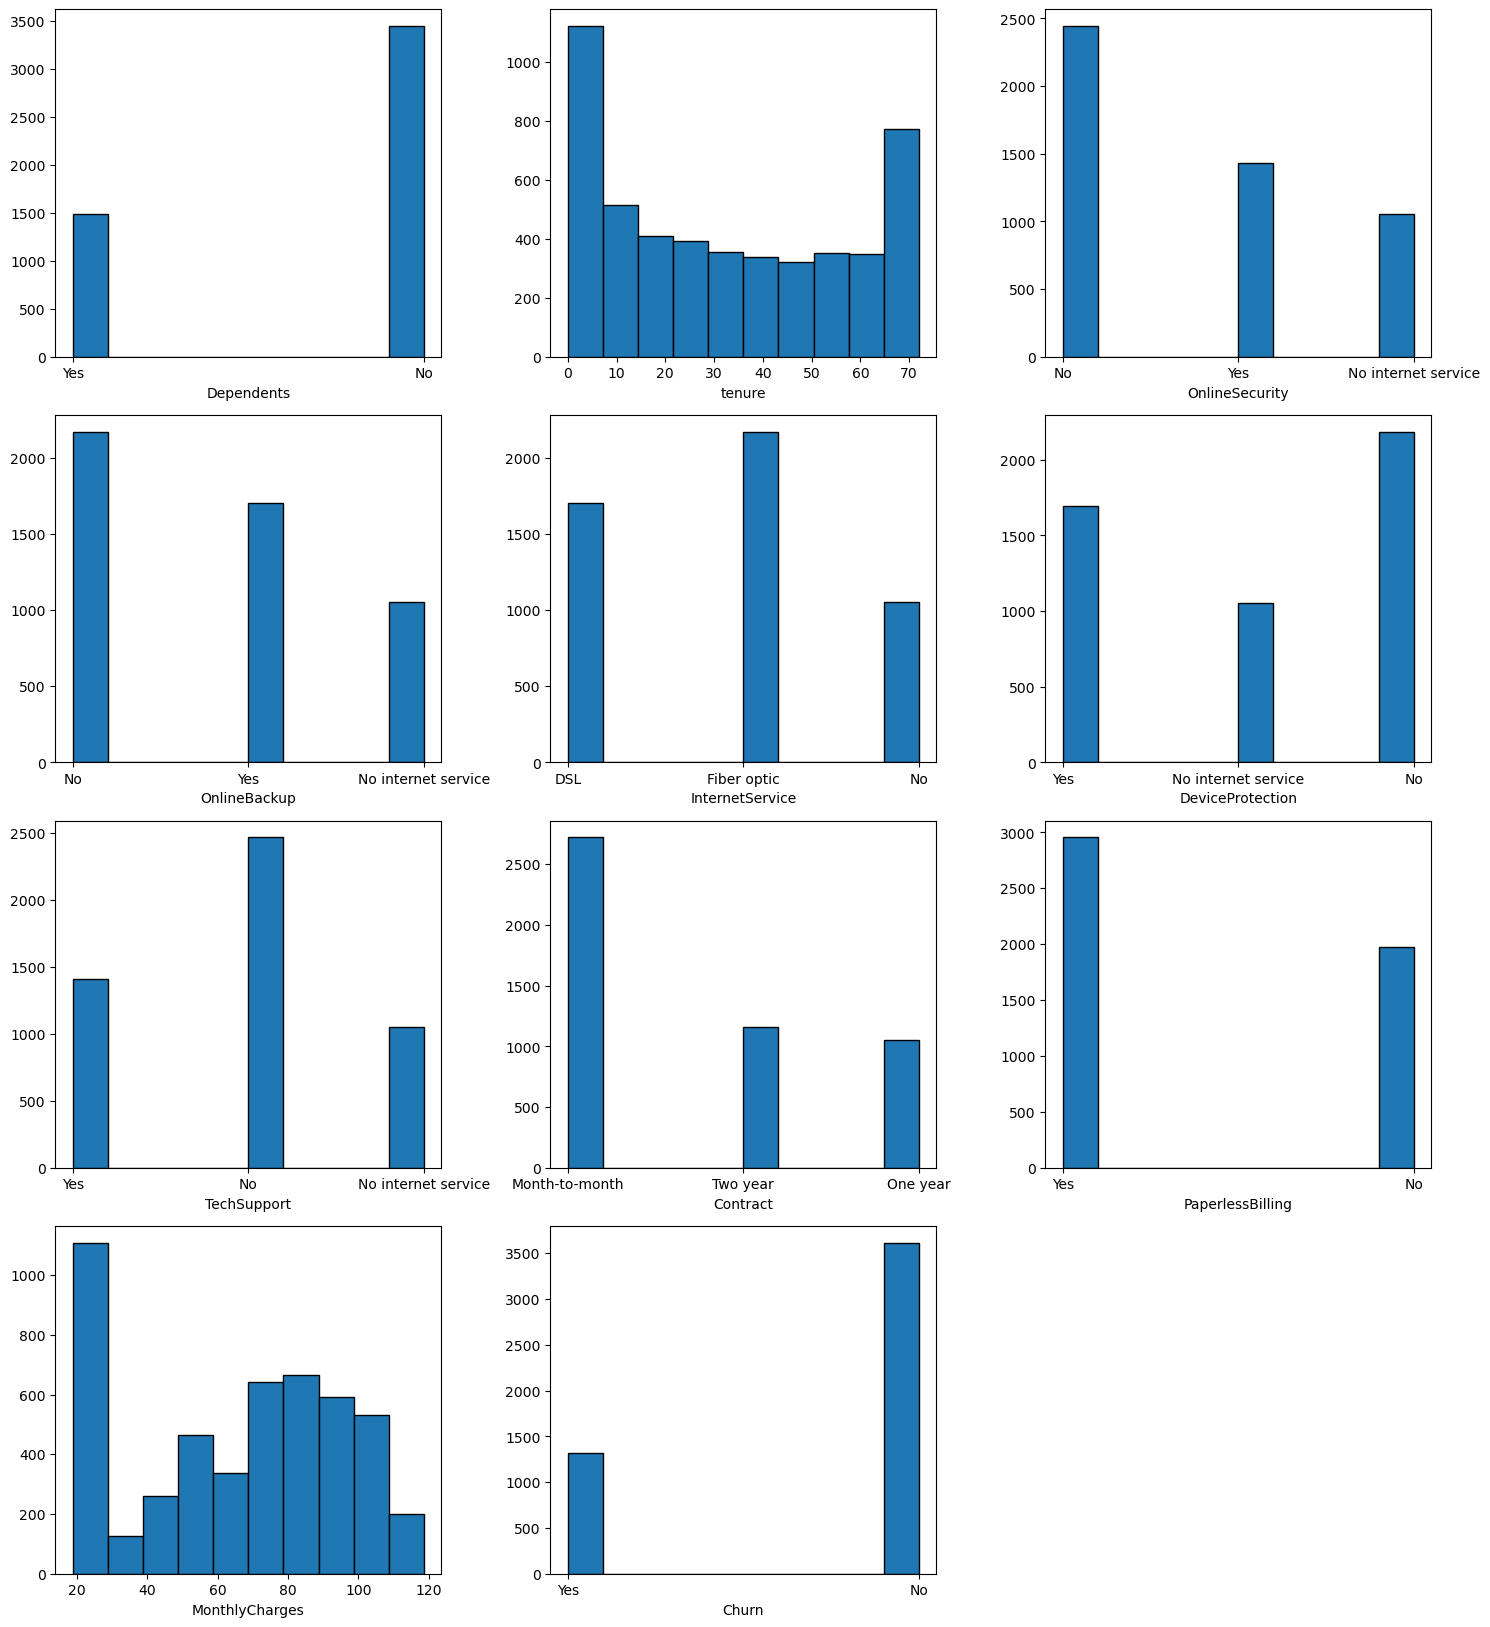

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,20))
for i,j in enumerate(df.columns):
        plt.subplot(len(df.columns)//2,len(df.columns)//3,i+1)
        plt.hist(df[j],edgecolor='black')
        plt.xlabel(j)
        plt.tight_layout()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Tidak terdapat missing value diindikasikan dengan jumlah Non-Null yang sesuai dengan jumlah baris pada tabel. 

In [4]:
df_num=[i for i in df.columns if (df[i].dtypes=='int64' or df[i].dtypes=='float64')]
df_cat=[i for i in df.columns if i not in df_num]
df_cat.remove('Churn')

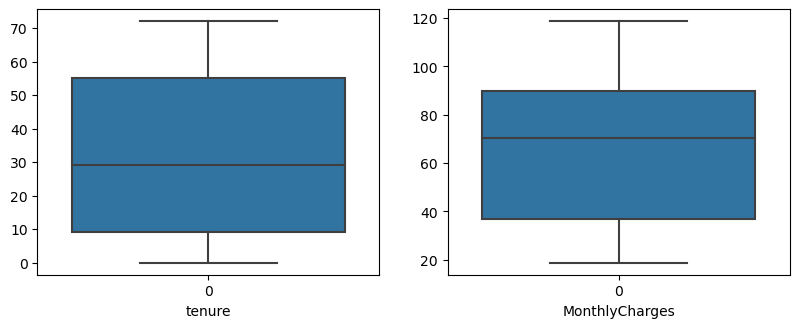

In [5]:
plt.figure(figsize=(15,20))
for i,j in enumerate(df_num):
        plt.subplot(len(df.columns)//2,len(df.columns)//3,i+1)
        sns.boxplot(df[j])
        plt.xlabel(j)

In [6]:
df[df.duplicated(keep=False)]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
87,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
187,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
204,No,18,No internet service,No internet service,No,No internet service,No internet service,One year,No,20.10,No
233,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.90,No
264,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,74.45,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.05,No
4786,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df[df.duplicated(keep=False)]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn


### Describe Data

In [9]:
df[df_num].describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


In [10]:
df[df_cat].describe()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling
count,4853,4853,4853,4853,4853,4853,4853,4853
unique,2,3,3,3,3,3,3,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes
freq,3380,2420,2148,2154,2162,2442,2665,2925


In [11]:
df_cat

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling']

## Data Visualization 

### Univariate Analysis ###

<AxesSubplot:xlabel='Dependents', ylabel='count'>

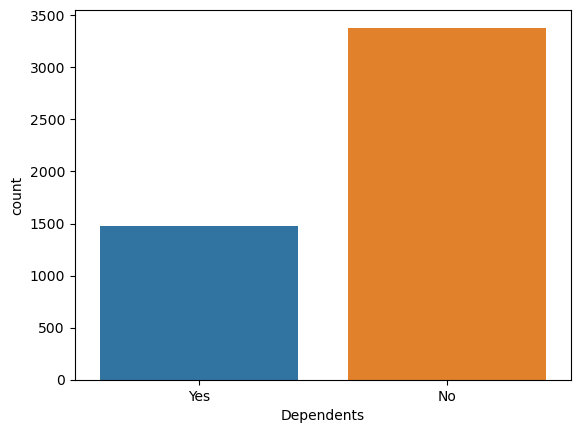

In [12]:
sns.countplot(x=df['Dependents'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

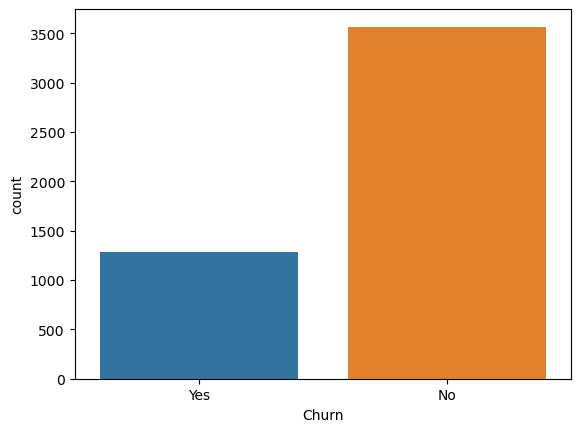

In [13]:
sns.countplot(x=df['Churn'])

Terlihat bahwa jumlah Churn dan Dependents memiliki jumlah yang sama. Namun apakah kedua berkaitan? Nanti akan kita bahas lebih lanjut

<AxesSubplot:xlabel='Contract', ylabel='count'>

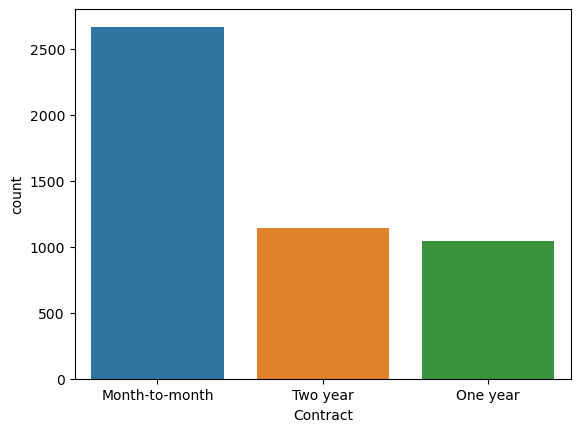

In [14]:
sns.countplot(x=df['Contract'])

## Bivariate Analysis

In [15]:
import plotly.express as px

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

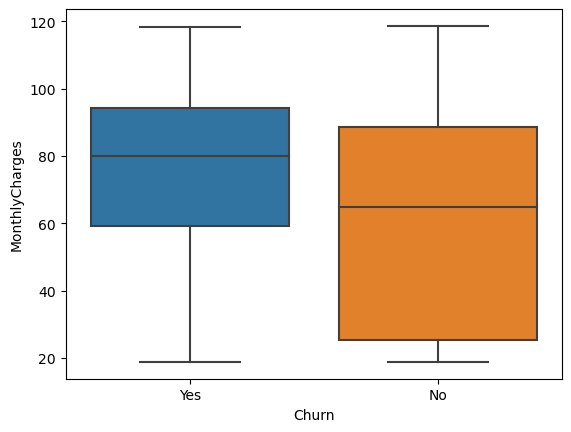

In [16]:
sns.boxplot(x=df['Churn'],y=df['MonthlyCharges'])

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

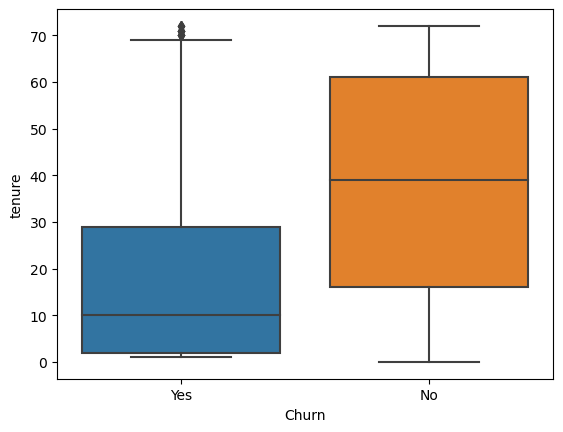

In [17]:
sns.boxplot(x=df['Churn'],y=df['tenure'])

## Multivariete Analysis 

In [18]:
group_depend=df.groupby(['Churn','Dependents']).mean(numeric_only=True)[['tenure']].reset_index()

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

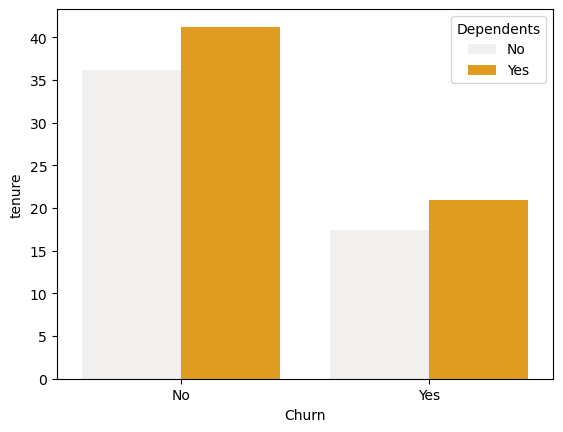

In [19]:
sns.barplot(data=group_depend,x='Churn',y='tenure',hue='Dependents',color='orange')

Jumlah rata rata tenure yang dimiliki oleh Churn yang memiliki anggota keluarga yang berdampingan lebih tinggi dikarenakan kebutuhan komunikasi dalam rumah tangga sangat penting untuk komunikasi jarak jauh ataupun hiburan anak. 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

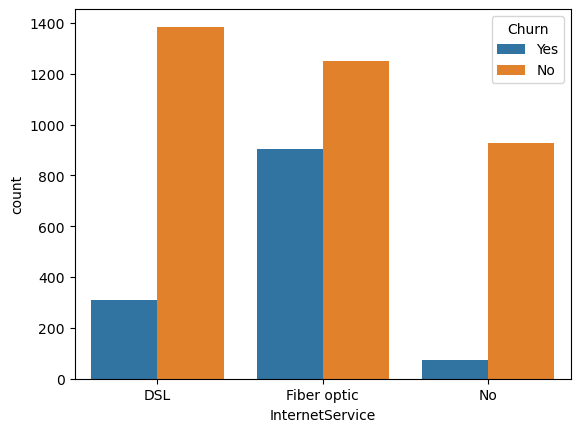

In [20]:
sns.countplot(x=df['InternetService'],hue=df['Churn'])

In [21]:
df.groupby('InternetService').mean(numeric_only=True)[['MonthlyCharges']]

,MonthlyCharges
InternetService,
DSL,58.183992
Fiber optic,91.518825
No,21.130459


Sebagian besar tenure yang memiliki rata rata rendah tidak menggunakan layanan internet yang digunakan sehinggga fitur fitur tambahan yang disediakan tidak dapat dirasakan oleh pengguna. 

In [22]:
cat_yes=dict()
for i in df_cat:
    x=df[df['Churn']=='Yes'].groupby(['Churn',i]).count()[['tenure']].reset_index()
    cat_yes[i]=x[x[i]=='Yes'].values
del cat_yes['InternetService']
del cat_yes['Contract']
del cat_yes['PaperlessBilling']
del cat_yes['Dependents']
for i in cat_yes.keys():
    cat_yes[i]=cat_yes[i][0][-1]
cat_yes=pd.DataFrame({'Service':cat_yes.keys(),'Jumlah Churn':cat_yes.values()})

Beberapa fitur tambahan seperti contract dan paperless billing dihapus dikarenakan tidak saling berkaitan dengan erat dengan pelayanan yang digunakan selain dengan beberapa fitur lainnya sehingga kedua fitur tersebut dihapus dan ditambah dengan internet service dikarenakan disini hanya ingin melihat fitur tambahan dari internet service tersebut.

In [23]:
cat_yes=cat_yes.sort_values('Jumlah Churn',ascending=False).reset_index(drop=True)

Text(0.5, 1.0, 'Jumlah Pengguna yang Churn pada Setiap Layanan')

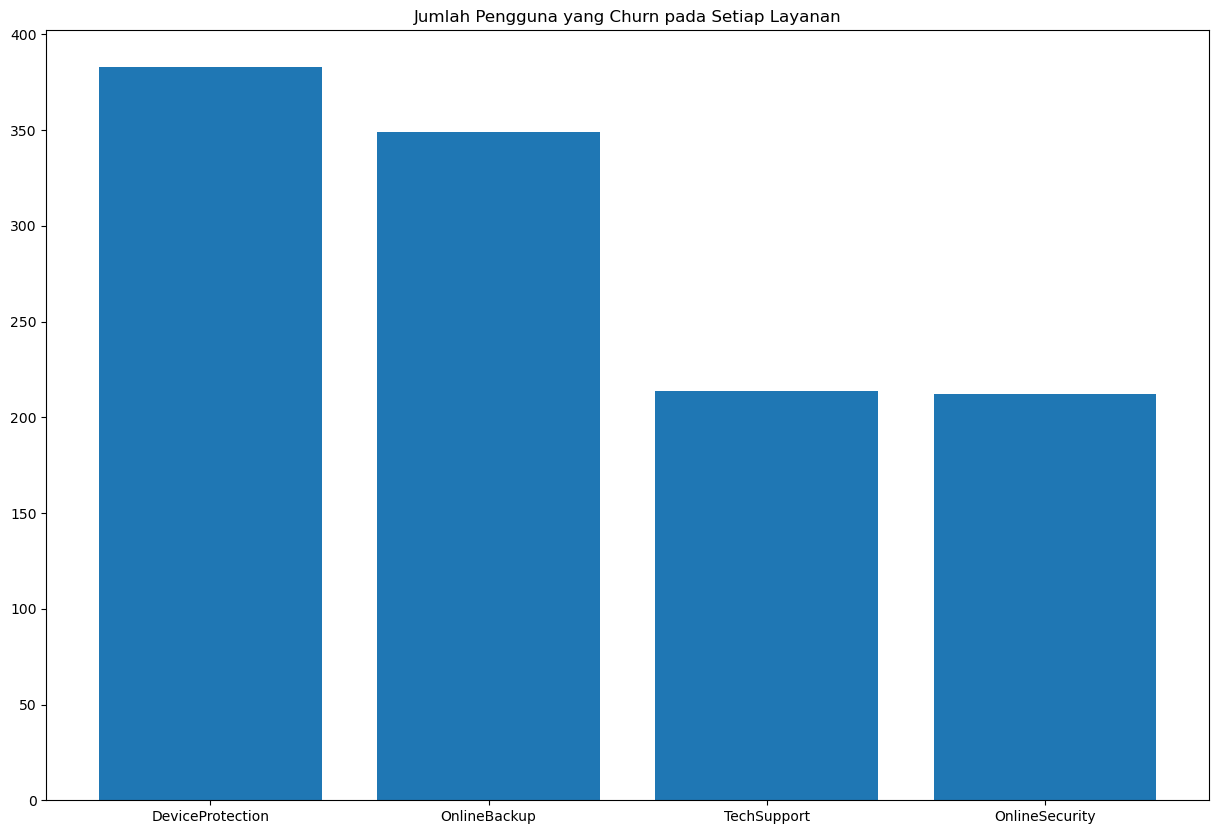

In [24]:
plt.figure(figsize=(15,10))
plt.bar(x=cat_yes["Service"],height=cat_yes['Jumlah Churn'])
plt.title('Jumlah Pengguna yang Churn pada Setiap Layanan')

## Kesimpulan Analisa

- Jumlah Pelanggan yang Churn dan Tidak Churn memiliki perbedaan yang cukup besar dimana nilai dari pelanggan yang churn jauh lebih sedikit (Under-Sampling) sehingga perlu penggunaan metode SMOTE untuk membuat beberapa nilai baru agar nilai churn dan tidak churn seimbang.
- Penggunaan contract month to month yang cukup besar memeperbesar kemungkinan orang untuk melakukan churn oleh karena itu perlu peningkatan kepercayaan pelanggan.
- Rata rata tenure yang dihabiskan oleh pelanggan yang retain cukup tinggi hal ini cukup relevan dikarenakan waktu tenure yang cukup besar mengindikasikan pelanggan masih tergolong dalam kategori retain.
- Internet service yang memiliki pelanggan churn terbanyak adalah fiber optic sehingga perlu ada maintance khusus atau penyesuaian harga untuk menarik pelanggan lebih banyak dikarenakan harga perbulan rata ratanya cukup tinggi berada pada 91.51 dollar per bulan selisih 43 dollar dengan DSL
- Fitur tambahan yang sering digunakan oleh pelanggan churn adalah Device Protection sehingga perlu adanya perhatian khusus untuk memperbaiki pelayanan tersebut

## Data Preparation

1. Encode 
2. Membuat Feature tambahan 
    - Full service (menggunakan semua fitur tambahan)
    - Ratio Monthly Charge dengan jumlah service
    - Ratio Contract dengan Tenure contract yang cukup pendek jauh lebih menguntungkan jika tenurenya tinggi *karena diluar harga bundle


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_le=dict()
x=str(df.columns)
if x.__contains__('key_0'):
    df.drop('key_0',axis=1)
for i in df_cat:
    if len(df[i].unique())<=2:
        df[i]=le.fit_transform(df[i])
    else :
        df=pd.merge(df,pd.get_dummies(df[i],prefix=i),left_on=df.index,right_index=True,how='left',copy=False)
        df=df.drop(i,axis=1)

In [26]:
df['Churn']=le.fit_transform(df['Churn'])
x=list()
for i in df.columns:
  x.append(i.title().replace(' ',''))
df.columns=x

In [27]:
import numpy as np
all_service=np.where((df['Onlinebackup_Yes']==1) & (df['Deviceprotection_Yes']==1) & (df['Onlinesecurity_Yes']==1) & (df['Techsupport_Yes']==1),1,0)
df['all_Service']=all_service

In [28]:
df.reset_index(drop=True,inplace=True)
temp=df[df['Contract_Month-To-Month']==1][['Tenure']]/1

temp_12=df[df['Contract_OneYear']==1][['Tenure']]/12

temp_13=df[df['Contract_TwoYear']==1][['Tenure']]/24

x=temp.append(temp_12)
df['Progress']=temp_13.append(x).sort_index().values

In [29]:
df['RatioCharges/Service']=df['Monthlycharges']/(1+df['Internetservice_Dsl']+df['Internetservice_FiberOptic']+df['Onlinebackup_Yes']+df['Deviceprotection_Yes']+df['Onlinesecurity_Yes']+df['Techsupport_Yes'])

## Machine Learning ##




In [30]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
svc=SVC()
LGBM=LGBMClassifier()
GPC=GaussianProcessClassifier()
LR=LogisticRegression()
RF=RandomForestClassifier()
XG=XGBClassifier()
SV=SVC()
SGD=SGDClassifier()
DT=DecisionTreeClassifier()
models=[GPC,LR,RF,XG,SV,SGD,DT,LGBM]
y=df.pop('Churn')
x=df
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

Model selection merupakan tahapan untuk memilih model estimator terbaik untuk klasifikasi. Pemilihan ini dilakukan pada saat sebelum balancing data dan hyperparameter tuning hal ini dikarenakan proses ini memakan waktu yang lama apabila dilibatkan dengan proses rinci lainnya. Untuk proses percobaan awal, setiap model 'classifier' akan dikumpulkan dan akan ditest satu per satu untuk diuji serta dinilai score roc_auc pada setiap model.Hal ini bertujuan untuk proses pemilihan model yang paling cocok untuk kasus klasifikasi pelanggan. Metode yang digunakan adalah penggunaan cross validasi pada data training yang sudah terbagi pada bagian sebelumnya. Metrics yang digunakan pada tahapan awal ini adalah precision.

In [31]:
score=[]
for i in models:
  shuffle=KFold(n_splits=10)
  estimator=Pipeline([('scaler',StandardScaler()),('models',i)])
  model_score=cross_validate(estimator,x_train,y_train,cv=shuffle,scoring='precision')
  score.append(model_score)

In [32]:
train_cv=pd.DataFrame(score)

In [33]:
train_cv

,fit_time,score_time,test_score
0,"[11.184990167617798, 11.135746479034424, 11.29...","[0.10962700843811035, 0.10374331474304199, 0.1...","[0.56, 0.6282051282051282, 0.5421686746987951,..."
1,"[0.06875729560852051, 0.05409526824951172, 0.0...","[0.008353471755981445, 0.006916999816894531, 0...","[0.6363636363636364, 0.6818181818181818, 0.621..."
2,"[0.5047273635864258, 0.44062280654907227, 0.44...","[0.02291417121887207, 0.023015737533569336, 0....","[0.6111111111111112, 0.6712328767123288, 0.534..."
3,"[1.6607704162597656, 0.6596617698669434, 0.665...","[0.008154869079589844, 0.007861614227294922, 0...","[0.64, 0.6756756756756757, 0.524390243902439, ..."
4,"[0.33017563819885254, 0.3168978691101074, 0.32...","[0.0410308837890625, 0.041422367095947266, 0.0...","[0.6491228070175439, 0.7288135593220338, 0.591..."
5,"[0.034535884857177734, 0.031409502029418945, 0...","[0.0035483837127685547, 0.003407716751098633, ...","[0.4642857142857143, 0.5978260869565217, 0.542..."
6,"[0.02194690704345703, 0.021358966827392578, 0....","[0.003426074981689453, 0.003388643264770508, 0...","[0.5212765957446809, 0.5686274509803921, 0.415..."
7,"[0.6411235332489014, 0.6039345264434814, 0.593...","[0.0048906803131103516, 0.005221366882324219, ...","[0.6153846153846154, 0.671875, 0.5568181818181..."


Pada setiap fold hasil test_score yang dinilai cukup beragam, untuk merangkum menjadi satu nilai akan dilakukan proses mean untuk menilai score secara keseluruhan pada tiap tiap model. Precision dipilih menjadi penilaian dasar dikarenakan data yang dihadapi diawal merupakan data imbalance dan mempertimbangkan false positive dibandingkan dengan false negative pada model. Untuk kasus churn, hasil prediksi yang terpenting adalah seberapa besar tingkat false positive dikarenakan hasil terprediksi meununjukan hasil churn namun pada kenyataannya tidak churn memiliki kerugian yang lebih besar dibandingkan dengan melihat false negative. Untuk proses penyelesaiannya tentunya akan mengeluarkan biaya yang lebih besar apabila kita salah memprediksi jumlah positive dikarenakan perlu adanya pendekatan dari pihak produk dengan memberikan voucher, discount, atau informasi promo dan apabila salah sasaran tentu akan merugikan. Salah satu metriks yang memperhatikan tingkat false positive tanpa melihat negative faktor adalah precision.

In [34]:
train_cv['fit_time']=pd.DataFrame(train_cv['fit_time'].values.tolist()).mean(1)
train_cv['score_time']=pd.DataFrame(train_cv['score_time'].values.tolist()).mean(1)
train_cv['test_score']=pd.DataFrame(train_cv['test_score'].values.tolist()).mean(1)
train_cv['model']=['Gaussian Process Classifier','Logistic Regressor','Random Forest Classifier','XGBoost Classifier','Support Vector','SGD','Decision Tree','LGBM']
train_cv=train_cv.sort_values('test_score',ascending=False).reset_index(drop=True)
train_cv

,fit_time,score_time,test_score,model
0,0.322516,0.041316,0.659912,Support Vector
1,0.053572,0.007221,0.634039,Logistic Regressor
2,0.447022,0.022675,0.601855,Random Forest Classifier
3,0.592400,0.004912,0.597691,LGBM
4,0.766346,0.008135,0.590042,XGBoost Classifier
5,11.161342,0.105020,0.578408,Gaussian Process Classifier
6,0.030047,0.003465,0.557801,SGD
7,0.021720,0.003509,0.494891,Decision Tree


Pada tabel diatas Support Vector mendapati tingkat precision paling besar dibandingkan dengan model lain. Untuk proses selanjutnya kita akan lebih berfokus pada kedua model ini untuk dianalisa lebih lanjut dengan data balanced dan hyperparameter tuning untuk melihat model yang paling cocok. Model XGBoost dipilih untuk model pembanding dikarenakan memiliki tingkat fleksibilitas yang tinggi pada proses hyperparameter serta mampu menampilkan beberapa feature importances yang mampu menjawab keragaman pola pelanggan churn. 

In [35]:
from sklearn.metrics import classification_report
for i in models:
  estimator=Pipeline([('scaler',StandardScaler()),('models',i)])
  model=estimator.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(i)
  print(classification_report(y_pred,y_test))

GaussianProcessClassifier()
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1115
           1       0.51      0.58      0.54       341

    accuracy                           0.77      1456
   macro avg       0.69      0.71      0.70      1456
weighted avg       0.78      0.77      0.78      1456

LogisticRegression()
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1145
           1       0.53      0.66      0.58       311

    accuracy                           0.80      1456
   macro avg       0.71      0.75      0.73      1456
weighted avg       0.82      0.80      0.81      1456

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1159
           1       0.48      0.62      0.54       297

    accuracy                           0.78      1456
   macro avg       0.69      0.72      0.70      1456


## Undersampling Handling

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix,plot_roc_curve,roc_auc_score
score=[]
def model_apply(x_train,x_test,y_train,y_test,model):
  global pred
  estimator=Pipeline([('scaler',StandardScaler()),('model',model)])
  estimator.fit(x_train,y_train)
  pred=estimator.predict(x_test)
  cv=RepeatedStratifiedKFold(n_repeats=10,n_splits=10,random_state=101)
  model_score=cross_val_score(estimator,x_train,y_train,cv=cv,scoring='precision')
  test_prec=precision_score(y_test,pred)
  print(f'precision_score={model_score.mean()}')
  print(f'test_precision={test_prec}')
  score.append([model_score.mean(),test_prec])
  
def model_scoring(y_train,y_test,x_test):
  cm=confusion_matrix(y_test,pred)
  sns.heatmap(cm,annot=True)
  print(classification_report(y_test,pred))


  

Untuk mempermudah proses benchmark model, dilakukan pembuatan fungsi untuk menghindari penulisan coding berulang. Pada model apply ini fungsi akan menjalankan proses fitting data terhadap model berdasarkan data yang dipilih. Return dari hasil ini adalah scoring dari 2 proses diantaranya adalah antara data train dengan validation set dan data train dengan data test. 

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [38]:
from imblearn.over_sampling import SMOTE
X,Y=SMOTE().fit_resample(x,y)

In [39]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y,test_size=0.3,random_state=101)

## Model Support Vector Imbalanced Data

In [40]:
model_apply(x_train,x_test,y_train,y_test,SV)

precision_score=0.6584351354437585
test_precision=0.6732283464566929


In [41]:
score

[[0.6584351354437585, 0.6732283464566929]]

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1068
           1       0.67      0.44      0.53       388

    accuracy                           0.79      1456
   macro avg       0.75      0.68      0.70      1456
weighted avg       0.78      0.79      0.78      1456



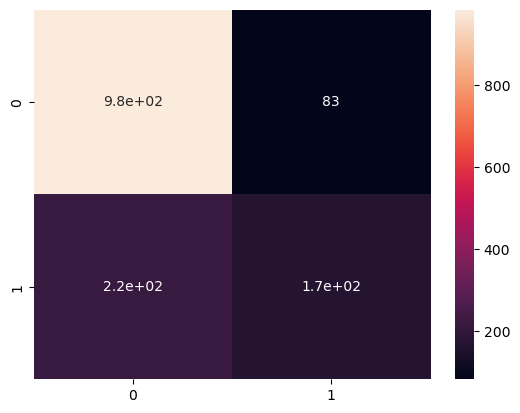

In [42]:
model_scoring(y_train,y_test,x_test)

## Model Support Vector Balanced Data

In [43]:
model_apply(x_train1,x_test1,y_train1,y_test1,SV)

precision_score=0.8034064561242186
test_precision=0.787719298245614


              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1087
           1       0.79      0.85      0.82      1052

    accuracy                           0.81      2139
   macro avg       0.82      0.82      0.81      2139
weighted avg       0.82      0.81      0.81      2139



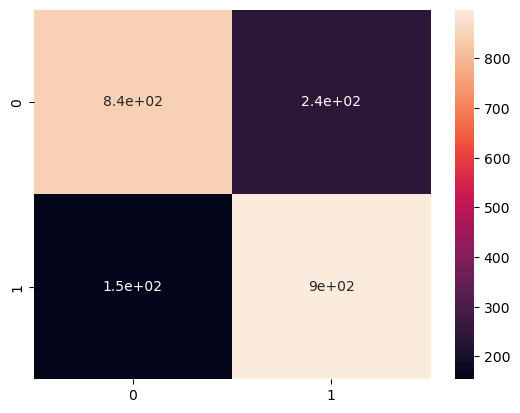

In [44]:
model_scoring(y_train1,y_test1,x_test1)

In [45]:
score

[[0.6584351354437585, 0.6732283464566929],
 [0.8034064561242186, 0.787719298245614]]

## Model XGBoost Classifier Imbalanced Data

In [46]:
model_apply(x_train,x_test,y_train,y_test,XG)

precision_score=0.592595454096661
test_precision=0.6165644171779141


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1068
           1       0.62      0.52      0.56       388

    accuracy                           0.79      1456
   macro avg       0.73      0.70      0.71      1456
weighted avg       0.78      0.79      0.78      1456



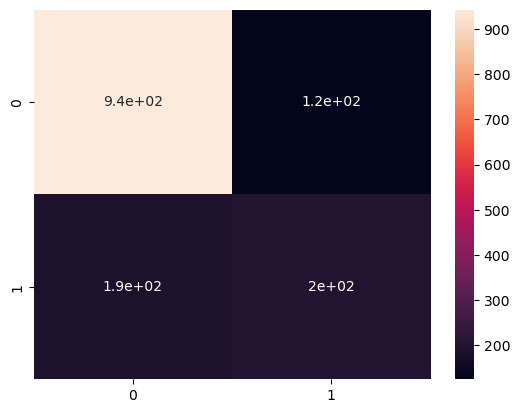

In [47]:
model_scoring(y_train,y_test,x_test)

## Model XGBoost Classifier Balanced Data

In [48]:
model_apply(x_train1,x_test1,y_train1,y_test1,XG)

precision_score=0.8313193485282991
test_precision=0.8201304753028891


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1087
           1       0.82      0.84      0.83      1052

    accuracy                           0.83      2139
   macro avg       0.83      0.83      0.83      2139
weighted avg       0.83      0.83      0.83      2139



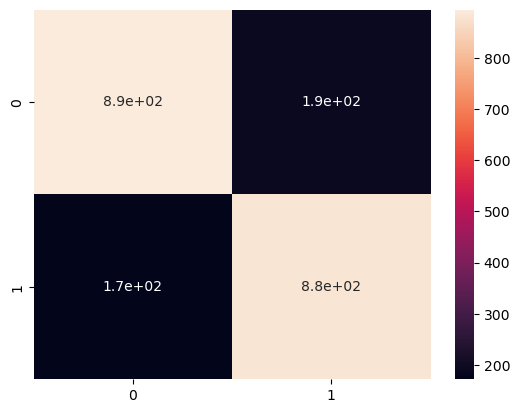

In [49]:
model_scoring(y_train1,y_test1,x_test1)

In [50]:
score

[[0.6584351354437585, 0.6732283464566929],
 [0.8034064561242186, 0.787719298245614],
 [0.592595454096661, 0.6165644171779141],
 [0.8313193485282991, 0.8201304753028891]]

## Model StackClassifier(SVC & XGBoost) Imbalanced Data

In [51]:
from sklearn.ensemble import StackingClassifier
stack=StackingClassifier(estimators=[('svc',SV),('xgb',XG)],final_estimator=XG)

In [52]:
model_apply(x_train,x_test,y_train,y_test,stack)

precision_score=0.5873672447275191
test_precision=0.608540925266904


              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1068
           1       0.61      0.44      0.51       388

    accuracy                           0.78      1456
   macro avg       0.71      0.67      0.68      1456
weighted avg       0.76      0.78      0.76      1456



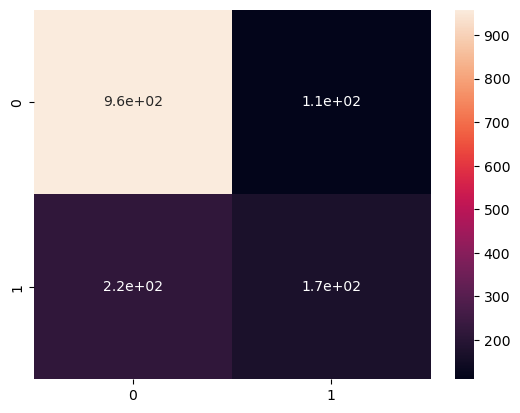

In [53]:
model_scoring(y_train,y_test,x_test)

## Model StackClassifier(SVC & XGBoost) Balanced Data

In [54]:
model_apply(x_train1,x_test1,y_train1,y_test1,stack)

precision_score=0.8197048973660418
test_precision=0.819718309859155


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1087
           1       0.82      0.83      0.82      1052

    accuracy                           0.83      2139
   macro avg       0.83      0.83      0.83      2139
weighted avg       0.83      0.83      0.83      2139



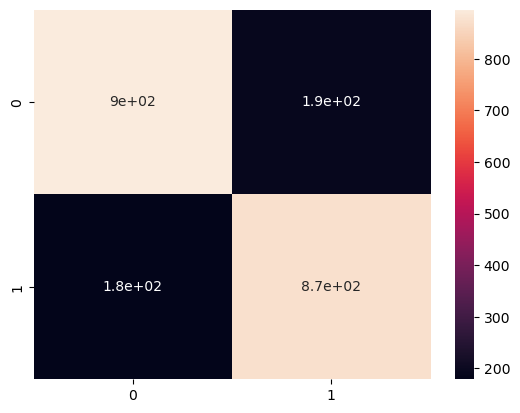

In [55]:
model_scoring(y_train1,y_test1,x_test1)

In [56]:
score

[[0.6584351354437585, 0.6732283464566929],
 [0.8034064561242186, 0.787719298245614],
 [0.592595454096661, 0.6165644171779141],
 [0.8313193485282991, 0.8201304753028891],
 [0.5873672447275191, 0.608540925266904],
 [0.8197048973660418, 0.819718309859155]]

In [172]:
result=pd.DataFrame({'Model':['Unbalanced SV','Balanced SV','Unbalanced XG','Balanced XG','Unbalanced Stacked','Balanced Stacked']})
result[['Validation_Precision_score','Test_Precision_Score']]=score

In [173]:
result

,Model,Validation_Precision_score,Test_Precision_Score
0,Unbalanced SV,0.658435,0.673228
1,Balanced SV,0.803406,0.787719
2,Unbalanced XG,0.592595,0.616564
3,Balanced XG,0.831319,0.820130
4,Unbalanced Stacked,0.587367,0.608541
5,Balanced Stacked,0.819705,0.819718


## Kesimpulan Model Selection
- Nilai Presisi tertinggi diraih oleh kombinasi antara model XGBoost dengan data Balanced dengan score precision sebesar 0.83 pada data validasi dan 0.82 pada data test.
- Untuk proses selanjutnya model Support Vector Machine dan Stacked tidak akan digunakan pada proses hyperparameter tuning.

## HyperParameter Tuning 

Hyperparameter tuning merupakan tahapan untuk menyempurnakan model dengan mencari kombinasi parameter yang tepat untuk menghasilkan tingkat penilaian metrics yang sesuai. Tahapan ini dilakukan setelah tahapan model selection untuk memperkecil ruang lingkup percobaan. Beberapa parameter akan dideklarasikan di awal tahapan dengan memberikan rentang nilai yang sesuai dengan parameter model. Nantinya setiap rentang nilai ini akan dihubungkan satu sama lain untuk menghasilkan nilai terbaik. Untuk metrics percobaan masih tetap sama yakni menggunakan presisi sebagai acuan utama. 

In [114]:
XGB=XGBClassifier()

In [156]:
model=XGB.fit(x_train1,y_train1)

In [157]:
pred=model.predict(x_test1)
print(classification_report(y_test1,pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1087
           1       0.82      0.84      0.83      1052

    accuracy                           0.83      2139
   macro avg       0.83      0.83      0.83      2139
weighted avg       0.83      0.83      0.83      2139



Proses diatas merupakan tahapan awal untuk menentukan baseline dari performa model yang akan di tingkatkan. Presisi untuk menentukan pelanggan yang churn lebih rendah dibandingkan yang tidak. Goal utama dari ini adalah mencari kombinasi dengan keluaran presisi yang memumpuni yakni tingkat presisi pada nilai 1 yang cukup tinggi dibandingkan sebelumnya.

In [180]:
params={'booster':['gbtree','dart'],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

Untuk tahap hyperparameter tuning akan dilakukan pencarian skala besar pada beberapa parameter yang memiliki tingkat pengaruh yang cukup tinggi pada model seperti pemilihan bosster, maksimum kedalam dan nilai minimum weight pada anak daun. Tahapan hyperparameter akan dilakukan secara bertahap menyesuaikan dengan kemampuan dari komputer yang dimiliki serta waktu yang digunakan. 

In [181]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=XGB,param_grid=params,scoring='precision',verbose=True)

In [182]:
grid.fit(x_train1,y_train1)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n

In [186]:
grid.best_params_

{'booster': 'gbtree', 'max_depth': 9, 'min_child_weight': 3}

Pada tahapan pertama nilai score terbaik diraih oleh booster gbtree namun untuk maximum depth dan minimum child weight akan dipersempit pada grid search selanjutnya untuk mendapatkan hasil yang optimal. 

In [191]:
params2={'booster':['gbtree'],
 'max_depth':[8,9,10],
 'min_child_weight':[2,3,4],'gamma':[i/10 for i in range(0,5)]
}
grid2=GridSearchCV(estimator=XGB,param_grid=params2,scoring='precision',verbose=True)

In [192]:
grid2.fit(x_train1,y_train1)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_...x_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimato

In [193]:
grid2.best_params_

{'booster': 'gbtree', 'gamma': 0.2, 'max_depth': 10, 'min_child_weight': 2}

Terdapat kombinasi nilai parameter yang baru untuk meningkatkan performa dengan tambahan penyesuaian nilai gamma. Untuk selanjutnya akan dilakukan pencarian parameter subsmaple dan colsample_bytree.

In [199]:
params3={
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid3=GridSearchCV(estimator=XGBClassifier(booster='gbtree', gamma=0.2, max_depth=10, min_child_weight=2),param_grid=params3,scoring='precision')
grid3.fit(x_train1,y_train1)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0.2, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                         

In [205]:
grid3.best_params_

{'colsample_bytree': 0.8, 'subsample': 0.9}

In [ ]:
params4={'lambda':[1e-5, 1e-2, 0.1, 1, 100],'learning_rate':}
grid4=GridSearchCV(estimator=XGBClassifier(booster='gbtree', gamma=0.2, max_depth=10, min_child_weight=2,colsample_bytree=0.8,subsample=0.9),param_grid=params4,scoring='precision')

In [ ]:
grid4.fit(x_train1,y_train1)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0.2, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                          

In [ ]:
grid4.best_score_

0.8325081753618375

In [211]:
grid3.best_score_

0.8325081753618375

In [212]:
grid2.best_score_

0.8351441858688233

Terdapat penurunan nilai rata rata presisi yang diberikan sehingga penyesuaian hyperparameter akan dihentikan dan berlanjut pada tahapan akhir yaitu fitting model pada data test.

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1075
           1       0.84      0.83      0.83      1064

    accuracy                           0.84      2139
   macro avg       0.84      0.84      0.84      2139
weighted avg       0.84      0.84      0.84      2139



<AxesSubplot:>

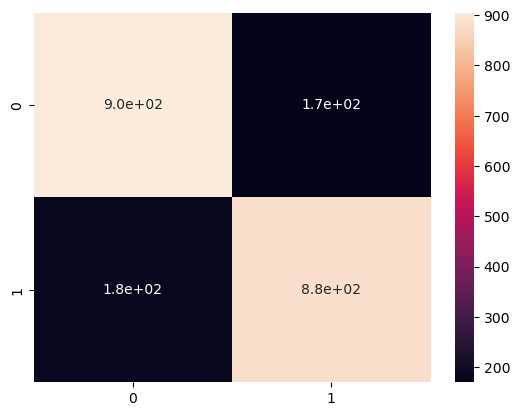

In [238]:
pred=grid4.best_estimator_.predict(x_test1)
print(classification_report(pred,y_test1))
sns.heatmap(confusion_matrix(pred,y_test1),annot=True)

<BarContainer object of 25 artists>

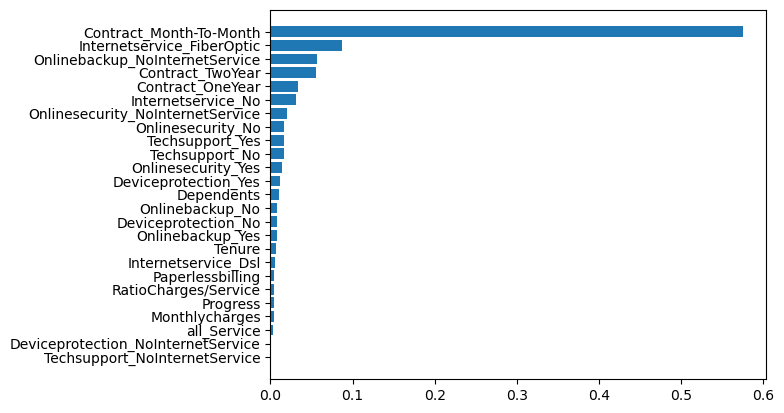

In [244]:
sorted_idx=grid4.best_estimator_.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],grid4.best_estimator_.feature_importances_[sorted_idx])

Setelah melalui berbagai tahapan pada feature engineering,model selection sampai hyperparameter tuning XGBoost dengan parameter  {'booster': 'gbtree', 'gamma': 0.2, 'max_depth': 10, 'min_child_weight': 2 } merupakan kombinasi parameter terbaik dipadukan dengan data yang telah di balancing dengan SMOTE Over Sampling dapat menjadi model paling presisi untuk kasus prediksi churn. Dari 'classification report' dapat terlihat terjadi peningkatan pada penilaian precision dari xgboost awal dengan akhir dimana diawal bernilai 0.82 dan setelah proses hyperparameter menjadi 0.84. Metriks 'accuracy' juga mengalami peningkatan dimana yang semula bernilai 0.83 menjadi 0.84. Sehingga tahapan hyperparameter tuning ini dapat memenuhi ekspektasi awal yakni mampu meningkatkan nilai metriks. Dikarenakan proses model selection menggunakan XGBoost, kita dapat menganalisa hasil feature importance melalui library yang disediakan(models.feature_importances_). Feature importances ini menunjukan seberapa penting kontribusi fitur pada penilaian akhir klasifikasi. Dapat terlihat pada gambar grafik bar horizontal 3 fitur terpenting yang dapat menjadi faktor penentu pelanggan churn diantaranya 'Contract_month_to_month','Internet_service_fiber_optic',dan'Online_backup_no_internet_service'. Apabila ketiga fitur tersebut bernilai 1 maka probabilitas orang tersebut akan churn cukup besar.
Model ini dapat digunakan lebih lanjut untuk monitoring dan juga evaluasi pelanggan. Dengan melakukan prediksi tentunya perusahaan mampu mengambil tindakan preventif untuk mencegah pelanggan churn diantaranya:
1. Menganalisa service yang perlu diperbaiki
2. Melakukan pendekatan terhadap pelanggan
3. Memberikan edukasi fitur terkait kepada pelanggan
4. Mengetahui pelanggan yang memiliki prioritas tinggi dalam tindakan retensi
5. Memberikan incentive seperti discount, voucher belanja, atau harga bundles.


In [245]:
#saving model
import joblib
joblib.dump(grid.best_params_, 'my_model_best1.pkl')

['my_model_best1.pkl']